In [1]:
import time

import numpy as np

from breakout.MonteCarloControlBreakout import MonteCarloControlBreakout
from breakout.main import play_game_using_mcc
from breakout.game import Game
from breakout.util import read_levels_data_from_csv
import matplotlib.pyplot as plt
from timeit import default_timer as timer

pygame 2.5.0 (SDL 2.28.0, Python 3.11.3)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [ ]:
def  layout_analysis(layout_adress):
    game_def = read_levels_data_from_csv(layout_adress)
    game = Game(game_def[0], game_def[1], game_def[2], reset_means_death_policy=False,reward_offset=10000)
    start = time.time()
    mc = MonteCarloControlBreakout(epsilon = 0.15, gamma = 0.5)
    num_episodes = 10
    episodes = np.arange(0,1000,num_episodes)
    durations_of_solution = [np.zeros(len(episodes)) for i in range(5)]
    num_of_solutions = np.zeros(len(episodes))
    for iter, episode in enumerate(episodes):
        rewards, trajectories = mc.run(num_episodes = num_episodes, game = game)
        print(rewards)
        trajectories_evaluation = mc.evaluation(game=game)
        for speed in range(5):
            durations_of_solution[speed][iter] = len(trajectories_evaluation[speed][0])
        num_of_solutions[iter] = len([durations_of_solution[speed][iter] for speed in range(5) if durations_of_solution[speed][iter] != 0])
    delta = time.time() - start
    #Here we plot all we need
    fig, axs = plt.subplots(2)
    axs[0].set_ylabel('duration of solution')
    for speed in range(5):
        axs[0].semilogy(episodes,durations_of_solution[speed],label = 'ball_speed_x = ' + str(speed-2))
    axs[0].legend(bbox_to_anchor=(1.01, 1.01))
    axs[1].set_xlabel('num of episodes')
    axs[1].set_ylabel('num of found solutions')
    axs[1].plot(episodes,num_of_solutions)
    axs[1].set_ylim([0, 5])
    axs[1].text(500, 1, 'Performance time = ' + str(round(delta,4)) + 's', fontsize = 10)
    plt.show()
    return mc, game, delta

In [ ]:
mc1, game1, delta_v1 = layout_analysis('../game_layouts/alien/c_small_13x9_s.csv')

In [ ]:
play_game_using_mcc(game1, mc1, game_update_time=50, always_take_best_action=True, initial_ball_speex_x = 2, out_file='../game_layouts/alien/c_small_13x9_s_speed_2.gif')

In [ ]:
mc2, game2, delta_v2  = layout_analysis('../game_layouts/alien/c_small_13x9_m.csv')

In [ ]:
play_game_using_mcc(game2, mc2, game_update_time=50, always_take_best_action=True, initial_ball_speex_x = 2, out_file='../game_layouts/alien/c_small_13x9_m_speed_2.gif')

In [ ]:
mc3, game3, delta_v3  = layout_analysis('../game_layouts/alien/c_small_13x9_l.csv')

In [ ]:
play_game_using_mcc(game3, mc3, game_update_time=50, always_take_best_action=True, initial_ball_speex_x = -2, out_file='../game_layouts/alien/c_small_13x9_l_speed_m2.gif')

In [ ]:
print("TIMES:")
print("5b:" + str(delta_v1))
print("10b:" + str(delta_v2))
print("15b:" + str(delta_v3))

In [ ]:
# plt.plot(-np.array(rewards_v1) + 10000)
# plt.plot(-np.array(rewards_v2) + 10000)
# plt.plot(-np.array(rewards_v3) + 10000)
# plt.ylabel('some numbers')
# plt.semilogy()
# plt.show()

In [7]:
def  layout_analysis_with_death(layout_adress):
    game_def = read_levels_data_from_csv(layout_adress)
    game = Game(game_def[0], game_def[1], game_def[2], reset_means_death_policy=True,reward_offset=10000)
    start = time.time()
    mc = MonteCarloControlBreakout(epsilon = 0.15, gamma = 0.5)
    num_episodes = 10
    episodes = np.arange(0,1000,num_episodes)
    durations_of_solution = [np.zeros(len(episodes)) for i in range(5)]
    num_of_solutions = np.zeros(len(episodes))
    for iter, episode in enumerate(episodes):
        rewards, trajectories = mc.run(num_episodes = num_episodes, game = game)
        print(rewards)
        trajectories_evaluation = mc.evaluation(game=game)
        for speed in range(5):
            durations_of_solution[speed][iter] = len(trajectories_evaluation[speed][0])
        num_of_solutions[iter] = len([durations_of_solution[speed][iter] for speed in range(5) if durations_of_solution[speed][iter] != 0])
    delta = time.time() - start
    #Here we plot all we need
    fig, axs = plt.subplots(2)
    axs[0].set_ylabel('duration of solution')
    for speed in range(5):
        axs[0].semilogy(episodes,durations_of_solution[speed],label = 'ball_speed_x = ' + str(speed-2))
    axs[0].legend(bbox_to_anchor=(1.01, 1.01))
    axs[1].set_xlabel('num of episodes')
    axs[1].set_ylabel('num of found solutions')
    axs[1].plot(episodes,num_of_solutions)
    axs[1].set_ylim([0, 5.5])
    axs[1].text(500, 1, 'Performance time = ' + str(round(delta,4)) + 's', fontsize = 10)
    plt.show()
    return mc, game, delta

MCC: finished!pisode: 9/10
[-100, -100, -100, -100, -100, -100, -100, -100, -100, -100]
MCC: finished!pisode: 9/10
[-100, -100, -100, -100, -100, -100, -100, -100, -100, -100]
MCC: finished!pisode: 9/10
[-100, -100, -100, -100, -100, -100, -100, -100, -100, -100]
MCC: finished!pisode: 9/10
[-100, -100, -100, -100, -100, -100, -100, -100, -100, -100]
MCC: finished!pisode: 9/10
[-100, -100, -100, -100, -100, -100, -100, -100, -100, -100]
MCC: finished!pisode: 9/10
[9896, -100, -100, -100, -100, -100, -100, -100, -100, -100]
MCC: finished!pisode: 9/10
[-100, -100, -100, -100, -100, -100, -100, -100, -100, -100]
MCC: finished!pisode: 9/10
[-100, -100, -100, -100, -100, -100, -100, -100, -100, -100]
MCC: finished!pisode: 9/10
[-100, -100, 9940, -100, -100, -100, -100, -100, -100, -100]
MCC: finished!pisode: 9/10
[-100, -100, -100, -100, -100, -100, -100, -100, -100, -100]
MCC: finished!pisode: 9/10
[-100, -100, -100, -100, -100, -100, -100, -100, -100, -100]
MCC: finished!pisode: 9/10
[-100

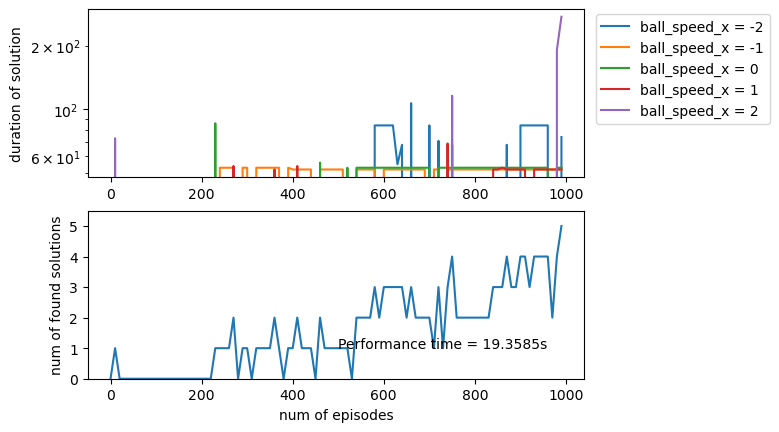

In [10]:
mc1, game1, delta_v1 = layout_analysis_with_death('../game_layouts/alien/c_small_13x9_s.csv')


In [4]:
play_game_using_mcc(game1, mc1, game_update_time=50, always_take_best_action=True, initial_ball_speex_x = -2, out_file='../game_layouts/alien/death_c_small_13x9_s_speed_m2.gif')
play_game_using_mcc(game1, mc1, game_update_time=50, always_take_best_action=True, initial_ball_speex_x = -1, out_file='../game_layouts/alien/death_c_small_13x9_s_speed_m1.gif')
play_game_using_mcc(game1, mc1, game_update_time=50, always_take_best_action=True, initial_ball_speex_x =  0, out_file='../game_layouts/alien/death_c_small_13x9_s_speed_0.gif')
play_game_using_mcc(game1, mc1, game_update_time=50, always_take_best_action=True, initial_ball_speex_x =  1, out_file='../game_layouts/alien/death_c_small_13x9_s_speed_1.gif')
play_game_using_mcc(game1, mc1, game_update_time=50, always_take_best_action=True, initial_ball_speex_x =  2, out_file='../game_layouts/alien/death_c_small_13x9_s_speed_2.gif')